In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

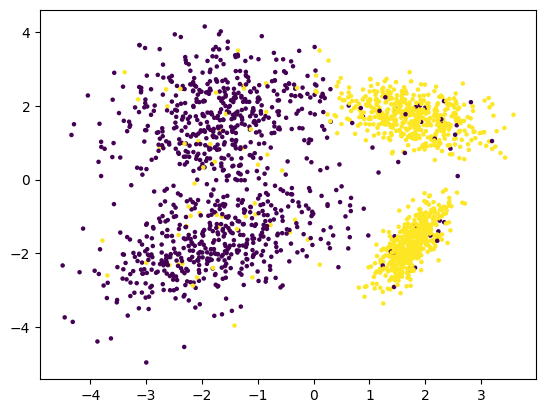

In [2]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state=21, class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

In [3]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

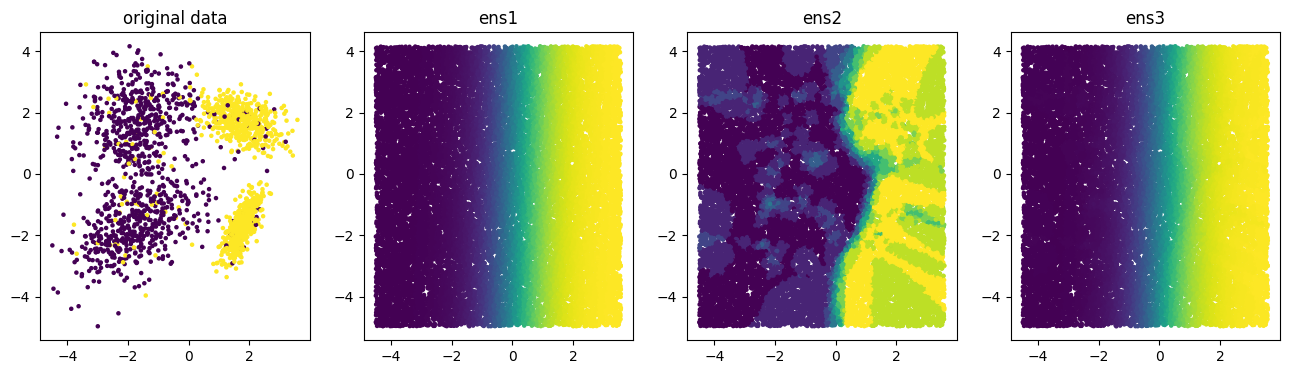

In [4]:
# There are 2 kinds of models we can use here: Logistic Regression (creates vertical line between the majority of the purple data and the yellow data) 
# or KNearesneighbor (whenever this algorithm needs to predict a point, it will look at the neighbour data in order to make a prediction. And, depending on where the prediction is required in the yellow region, it might predict a purple point.)
# So, we can say that a Logistic Regression will be too general since it will split the data by a vertical line, the KNearestneighbor is too specific at times. So, we want to be able to balance them out ==> This can be done by the Voting Classifier.

clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='soft', weights=[10, 0.5])  # weighing both models at 0.5 and `soft voting` means that we are averaging the predict_proba values
clf3.fit(X, y)
make_plots()
# We can see that in ens1 (LogisticRegression), we get the behavior we expect, having a line separating the 2 datasets.
# We can see that in ens2 (KNeighborsClassifier), we can see dark colors apear in the yellow region and lighter colors appear on the dark purple region
# We can see that in ens3 (VotingClassifier), we can see that we are smoothing the predictions of the 2 models (ens1, ens2). And, depending on the weights we give to the models, we will have different behaviors.
# PS: Note that if we use the VotingClassifier in our Pipeline, it will be our final model. However, we will be able to perform post processing since we can use different models as inputs to our VotingClassifier model.

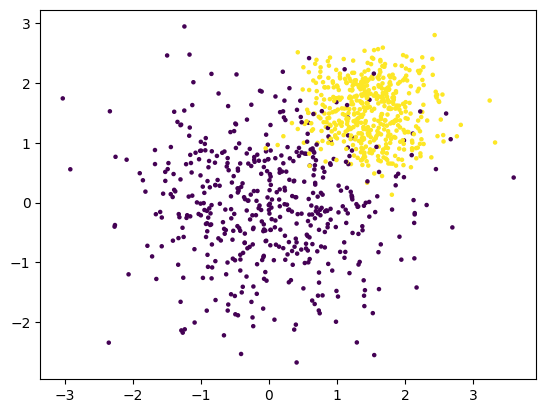

In [18]:
# ## Threshold
# # Let's have we have a slightly different dataset
# import numpy as np
# import pandas as pd
# import matplotlib.pylab as plt

# from sklearn.pipeline import Pipeline
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

# X, y = make_blobs(1000, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5])
# plt.scatter(X[:, 0], X[:, 1], c=y, s=5);